Train dataset size: 160
torch.Size([4, 224, 224])
Input shape: torch.Size([1, 4, 224, 224])
feature shape: torch.Size([1, 384, 28, 28])


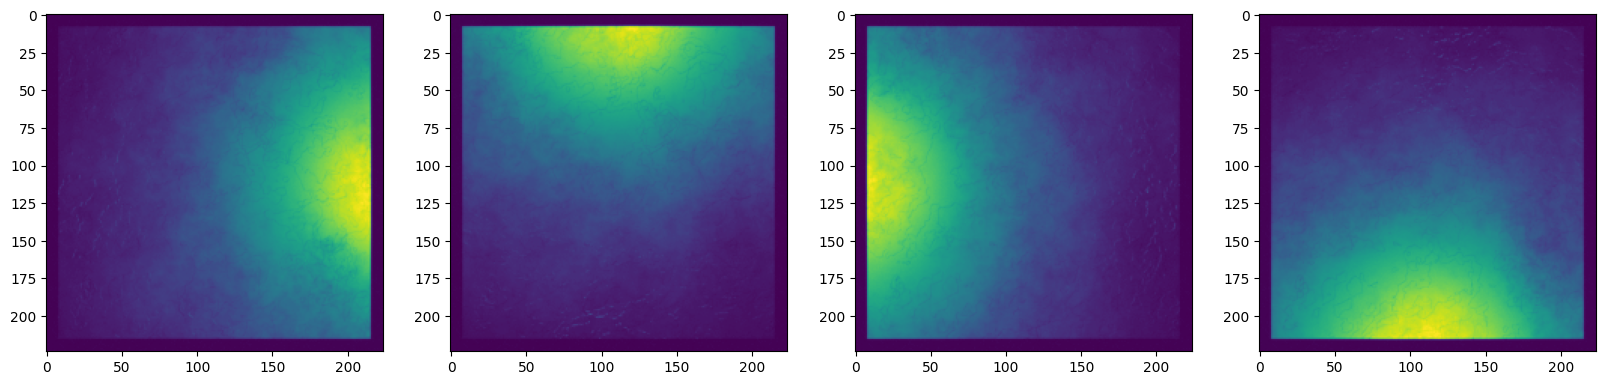

In [3]:
from models.Resnet18_CAE import resnet18_feature_extractor, resnet18_autoencoder
from src.Dataloader import Dataloader 
import torch




device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
n_images = 4
extractor = resnet18_feature_extractor(n_images)
extractor = extractor.to(device)
dataloader = Dataloader("Datasets/Dataset004")

BS = 16
train_loader, vali_loader, test_loader = dataloader.load_train_vali_test_dataloaders_with_n_images(n_images = n_images, BS=BS)

print('Train dataset size:', len(train_loader.dataset))
print(train_loader.dataset[0].shape)

images = dataloader.get_images(dataloader.path + "\Train", n_images=4)

images = torch.tensor(images, dtype=torch.float32)
image = images[0].unsqueeze(0)
feature = extractor(image.cuda())

model = resnet18_autoencoder(feature.shape[1])
model = model.to(device)
print("Input shape:", image.shape)
print("feature shape:", feature.shape)


import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 4, figsize=(20, 5))
ax[0].imshow(image[0].cpu().detach().numpy()[0])
ax[1].imshow(image[0].cpu().detach().numpy()[1])
ax[2].imshow(image[0].cpu().detach().numpy()[2])
ax[3].imshow(image[0].cpu().detach().numpy()[3])
plt.show()


Training:

  0%|          | 0/100 [00:00<?, ?it/s]

  1%|          | 1/100 [00:00<01:20,  1.23it/s]

Epoch [1/100], Loss: 0.0243, Validation Loss: 0.0166


  6%|▌         | 6/100 [00:02<00:28,  3.30it/s]

Epoch [6/100], Loss: 0.0019, Validation Loss: 0.0021


 11%|█         | 11/100 [00:03<00:24,  3.67it/s]

Epoch [11/100], Loss: 0.0012, Validation Loss: 0.0012


 16%|█▌        | 16/100 [00:04<00:22,  3.75it/s]

Epoch [16/100], Loss: 0.0009, Validation Loss: 0.0009


 21%|██        | 21/100 [00:06<00:21,  3.74it/s]

Epoch [21/100], Loss: 0.0007, Validation Loss: 0.0008


 26%|██▌       | 26/100 [00:07<00:19,  3.74it/s]

Epoch [26/100], Loss: 0.0006, Validation Loss: 0.0006


 31%|███       | 31/100 [00:08<00:18,  3.75it/s]

Epoch [31/100], Loss: 0.0006, Validation Loss: 0.0006


 36%|███▌      | 36/100 [00:10<00:17,  3.76it/s]

Epoch [36/100], Loss: 0.0005, Validation Loss: 0.0005


 41%|████      | 41/100 [00:11<00:15,  3.75it/s]

Epoch [41/100], Loss: 0.0005, Validation Loss: 0.0005


 46%|████▌     | 46/100 [00:12<00:14,  3.75it/s]

Epoch [46/100], Loss: 0.0005, Validation Loss: 0.0004


 51%|█████     | 51/100 [00:14<00:13,  3.74it/s]

Epoch [51/100], Loss: 0.0004, Validation Loss: 0.0004


 56%|█████▌    | 56/100 [00:15<00:11,  3.75it/s]

Epoch [56/100], Loss: 0.0004, Validation Loss: 0.0004


 61%|██████    | 61/100 [00:16<00:10,  3.75it/s]

Epoch [61/100], Loss: 0.0004, Validation Loss: 0.0004


 66%|██████▌   | 66/100 [00:18<00:09,  3.73it/s]

Epoch [66/100], Loss: 0.0004, Validation Loss: 0.0004


 71%|███████   | 71/100 [00:19<00:07,  3.73it/s]

Epoch [71/100], Loss: 0.0003, Validation Loss: 0.0003


 76%|███████▌  | 76/100 [00:20<00:06,  3.73it/s]

Epoch [76/100], Loss: 0.0003, Validation Loss: 0.0003


 81%|████████  | 81/100 [00:22<00:05,  3.74it/s]

Epoch [81/100], Loss: 0.0003, Validation Loss: 0.0003


 86%|████████▌ | 86/100 [00:23<00:03,  3.73it/s]

Epoch [86/100], Loss: 0.0003, Validation Loss: 0.0003


 91%|█████████ | 91/100 [00:24<00:02,  3.75it/s]

Epoch [91/100], Loss: 0.0003, Validation Loss: 0.0003


 96%|█████████▌| 96/100 [00:26<00:01,  3.75it/s]

Epoch [96/100], Loss: 0.0003, Validation Loss: 0.0003


100%|██████████| 100/100 [00:27<00:00,  3.66it/s]


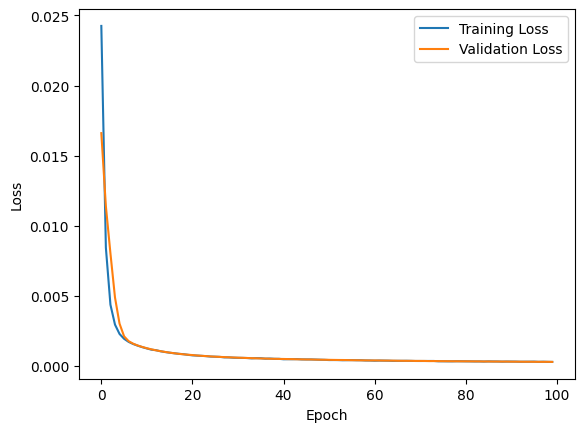

In [4]:
from tqdm import tqdm
import matplotlib.pyplot as plt
# Define a list to store training loss and validation loss

criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

Loss = []
Validation_Loss = []


num_epochs = 100
for epoch in tqdm(range(num_epochs)):
    model.train()  # Set model to training mode
    # for img, _ in train_loader:
    for idx, img in enumerate(train_loader):
        # print('img shape:', img.shape)
        img = img.cuda()
        feature = extractor(img) # Extract features using the feature extractor
        output = model(feature) # Pass the features through the autoencoder
        loss = criterion(output, feature) # Calculate the loss between the output and the original features

        optimizer.zero_grad() #clears the gradients of all optimized tensors.  This step is necessary because gradients are accumulated by default in PyTorch, and we want to compute fresh gradients for the current batch of data.
        loss.backward() # This line computes the gradients of the loss function with respect to the model parameters. These gradients are used to update the model parameters during optimization.
        optimizer.step() # This line updates the model parameters using the computed gradients. 
    Loss.append(loss.item())
       

    # Calculate validation loss
    model.eval()  # Set model to evaluation mode
    with torch.no_grad():
        val_loss_sum = 0.0
        num_batches = 0
        for idx, img in enumerate(vali_loader):
            img = img.cuda()
            feature = extractor(img)
            output = model(feature)
            val_loss = criterion(output, feature)
            val_loss_sum += val_loss.item()
            num_batches += 1
        val_loss_avg = val_loss_sum / num_batches
        Validation_Loss.append(val_loss_avg)
    
    if epoch % 5 == 0:
        print('Epoch [{}/{}], Loss: {:.4f}, Validation Loss: {:.4f}'.format(epoch + 1, num_epochs, loss.item(), val_loss_avg))

plt.plot(Loss, label='Training Loss')
plt.plot(Validation_Loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

feature shape: torch.Size([1, 384, 28, 28])


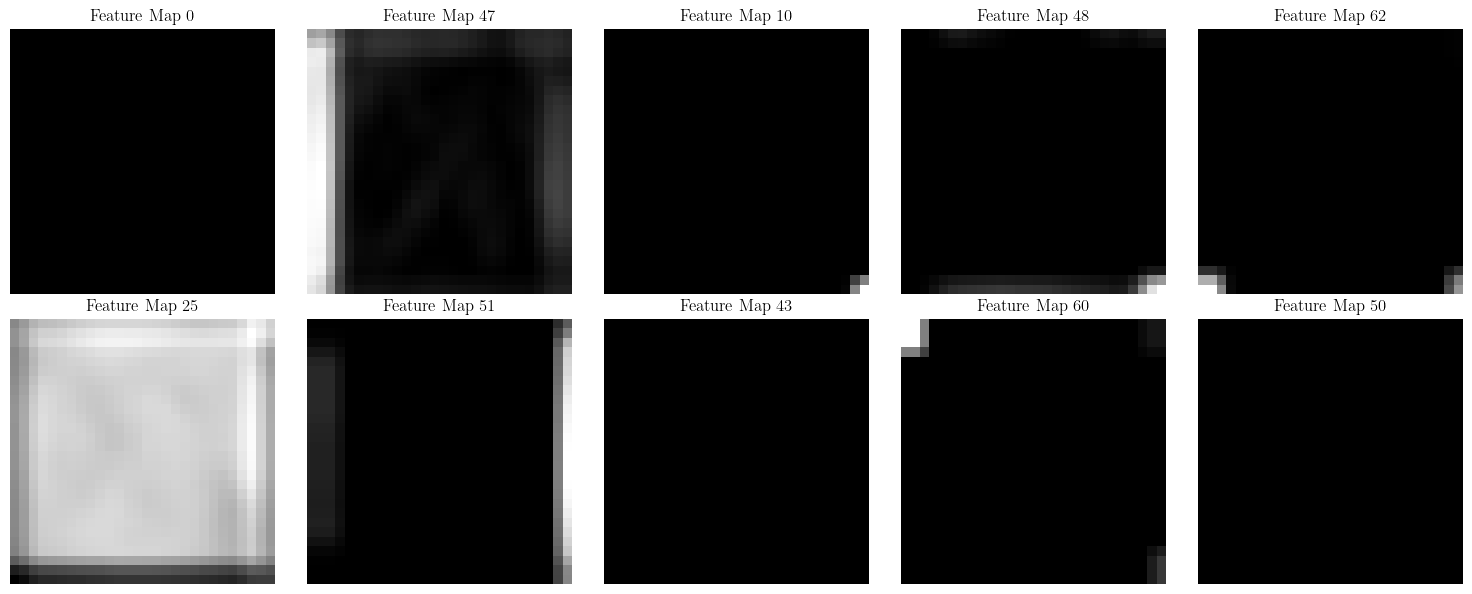

Output shape: torch.Size([1, 384, 28, 28])


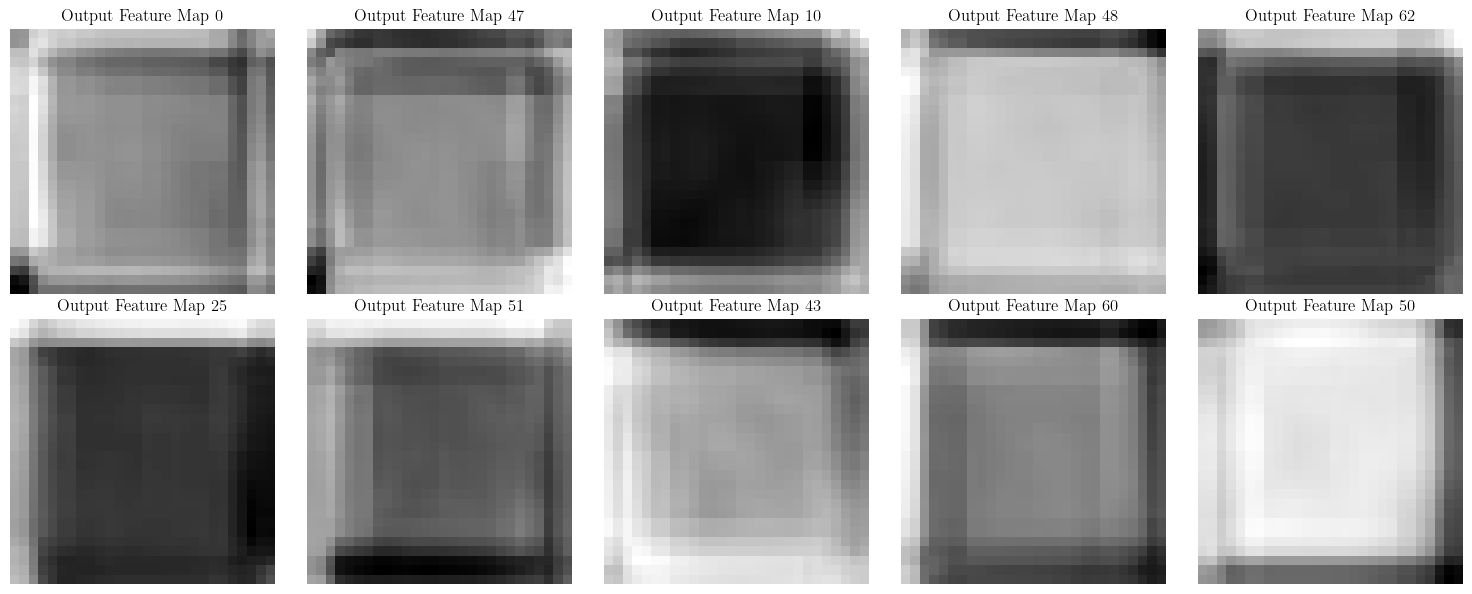

In [10]:
# Select 10 random indices for feature maps
images = dataloader.get_images(dataloader.path + "\Train", n_images=4)

images = torch.tensor(images, dtype=torch.float32)
image = images[0].unsqueeze(0)
feature = extractor(image.cuda())
print("feature shape:", feature.shape)

indices = torch.randperm(64)[:10]
indices[0] = 0
# print("Feature", feature[0,indices[0]].detach().cpu())
# Plot the selected feature maps
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
for i, idx in enumerate(indices):
    row = i // 5
    col = i % 5
    axes[row, col].imshow(feature[0,idx].detach().cpu(), cmap='gray')
    axes[row, col].set_title(f'Feature Map {idx}')
    axes[row, col].axis('off')
plt.tight_layout()
plt.show()

output = model(feature)
# print("Output", output[0, indices[0]].detach().cpu())
print("Output shape:", output.shape)
# Plot the output feature maps
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
for i, idx in enumerate(indices):
    row = i // 5
    col = i % 5
    axes[row, col].imshow(output[0,idx].detach().cpu(), cmap='gray')
    axes[row, col].set_title(f'Output Feature Map {idx}')
    axes[row, col].axis('off')
plt.tight_layout()

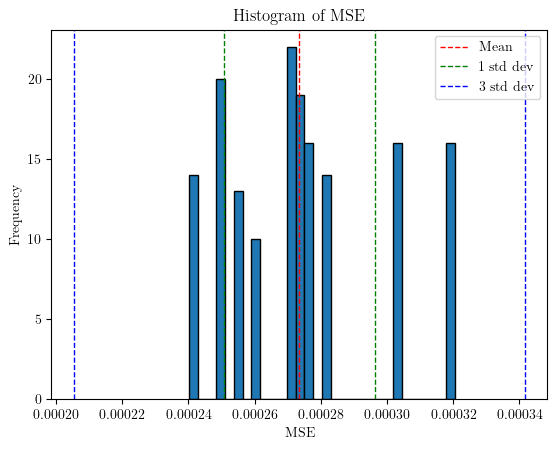

In [6]:
# ---------------------------------------------------------------------------- #
#                                FIND THRESHOLD                                #
# ---------------------------------------------------------------------------- #
import numpy as np
import matplotlib as mpl
# Enable LaTeX rendering
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'  # LaTeX default font is Computer Modern (serif)

train_loader, vali_loader, test_loader = dataloader.load_train_vali_test_dataloaders_with_n_images(n_images, BS=1)
MSE = []
for inputs in train_loader:
    inputs = inputs.cuda()
    feature = extractor(inputs) # Extract features using the feature extractor
    outputs = model(feature) # Pass the features through the autoencoder
    mse = criterion(outputs, feature).item()
    MSE.append(mse)
mean = np.mean(MSE)
variance = np.var(MSE)

plt.hist(MSE, bins=30, edgecolor='black')
plt.axvline(x=np.mean(MSE), color='r', linestyle='dashed', linewidth=1, label='Mean')
plt.axvline(x=np.mean(MSE) + np.sqrt(variance), color='g', linestyle='dashed', linewidth=1, label='1 std dev')
plt.axvline(x=np.mean(MSE) - np.sqrt(variance), color='g', linestyle='dashed', linewidth=1)
plt.axvline(x=np.mean(MSE) + 3*np.sqrt(variance), color='b', linestyle='dashed', linewidth=1, label='3 std dev')
plt.axvline(x=np.mean(MSE) - 3*np.sqrt(variance), color='b', linestyle='dashed', linewidth=1)
plt.title('Histogram of MSE')
plt.xlabel('MSE')
plt.ylabel('Frequency')
plt.legend()
plt.show()

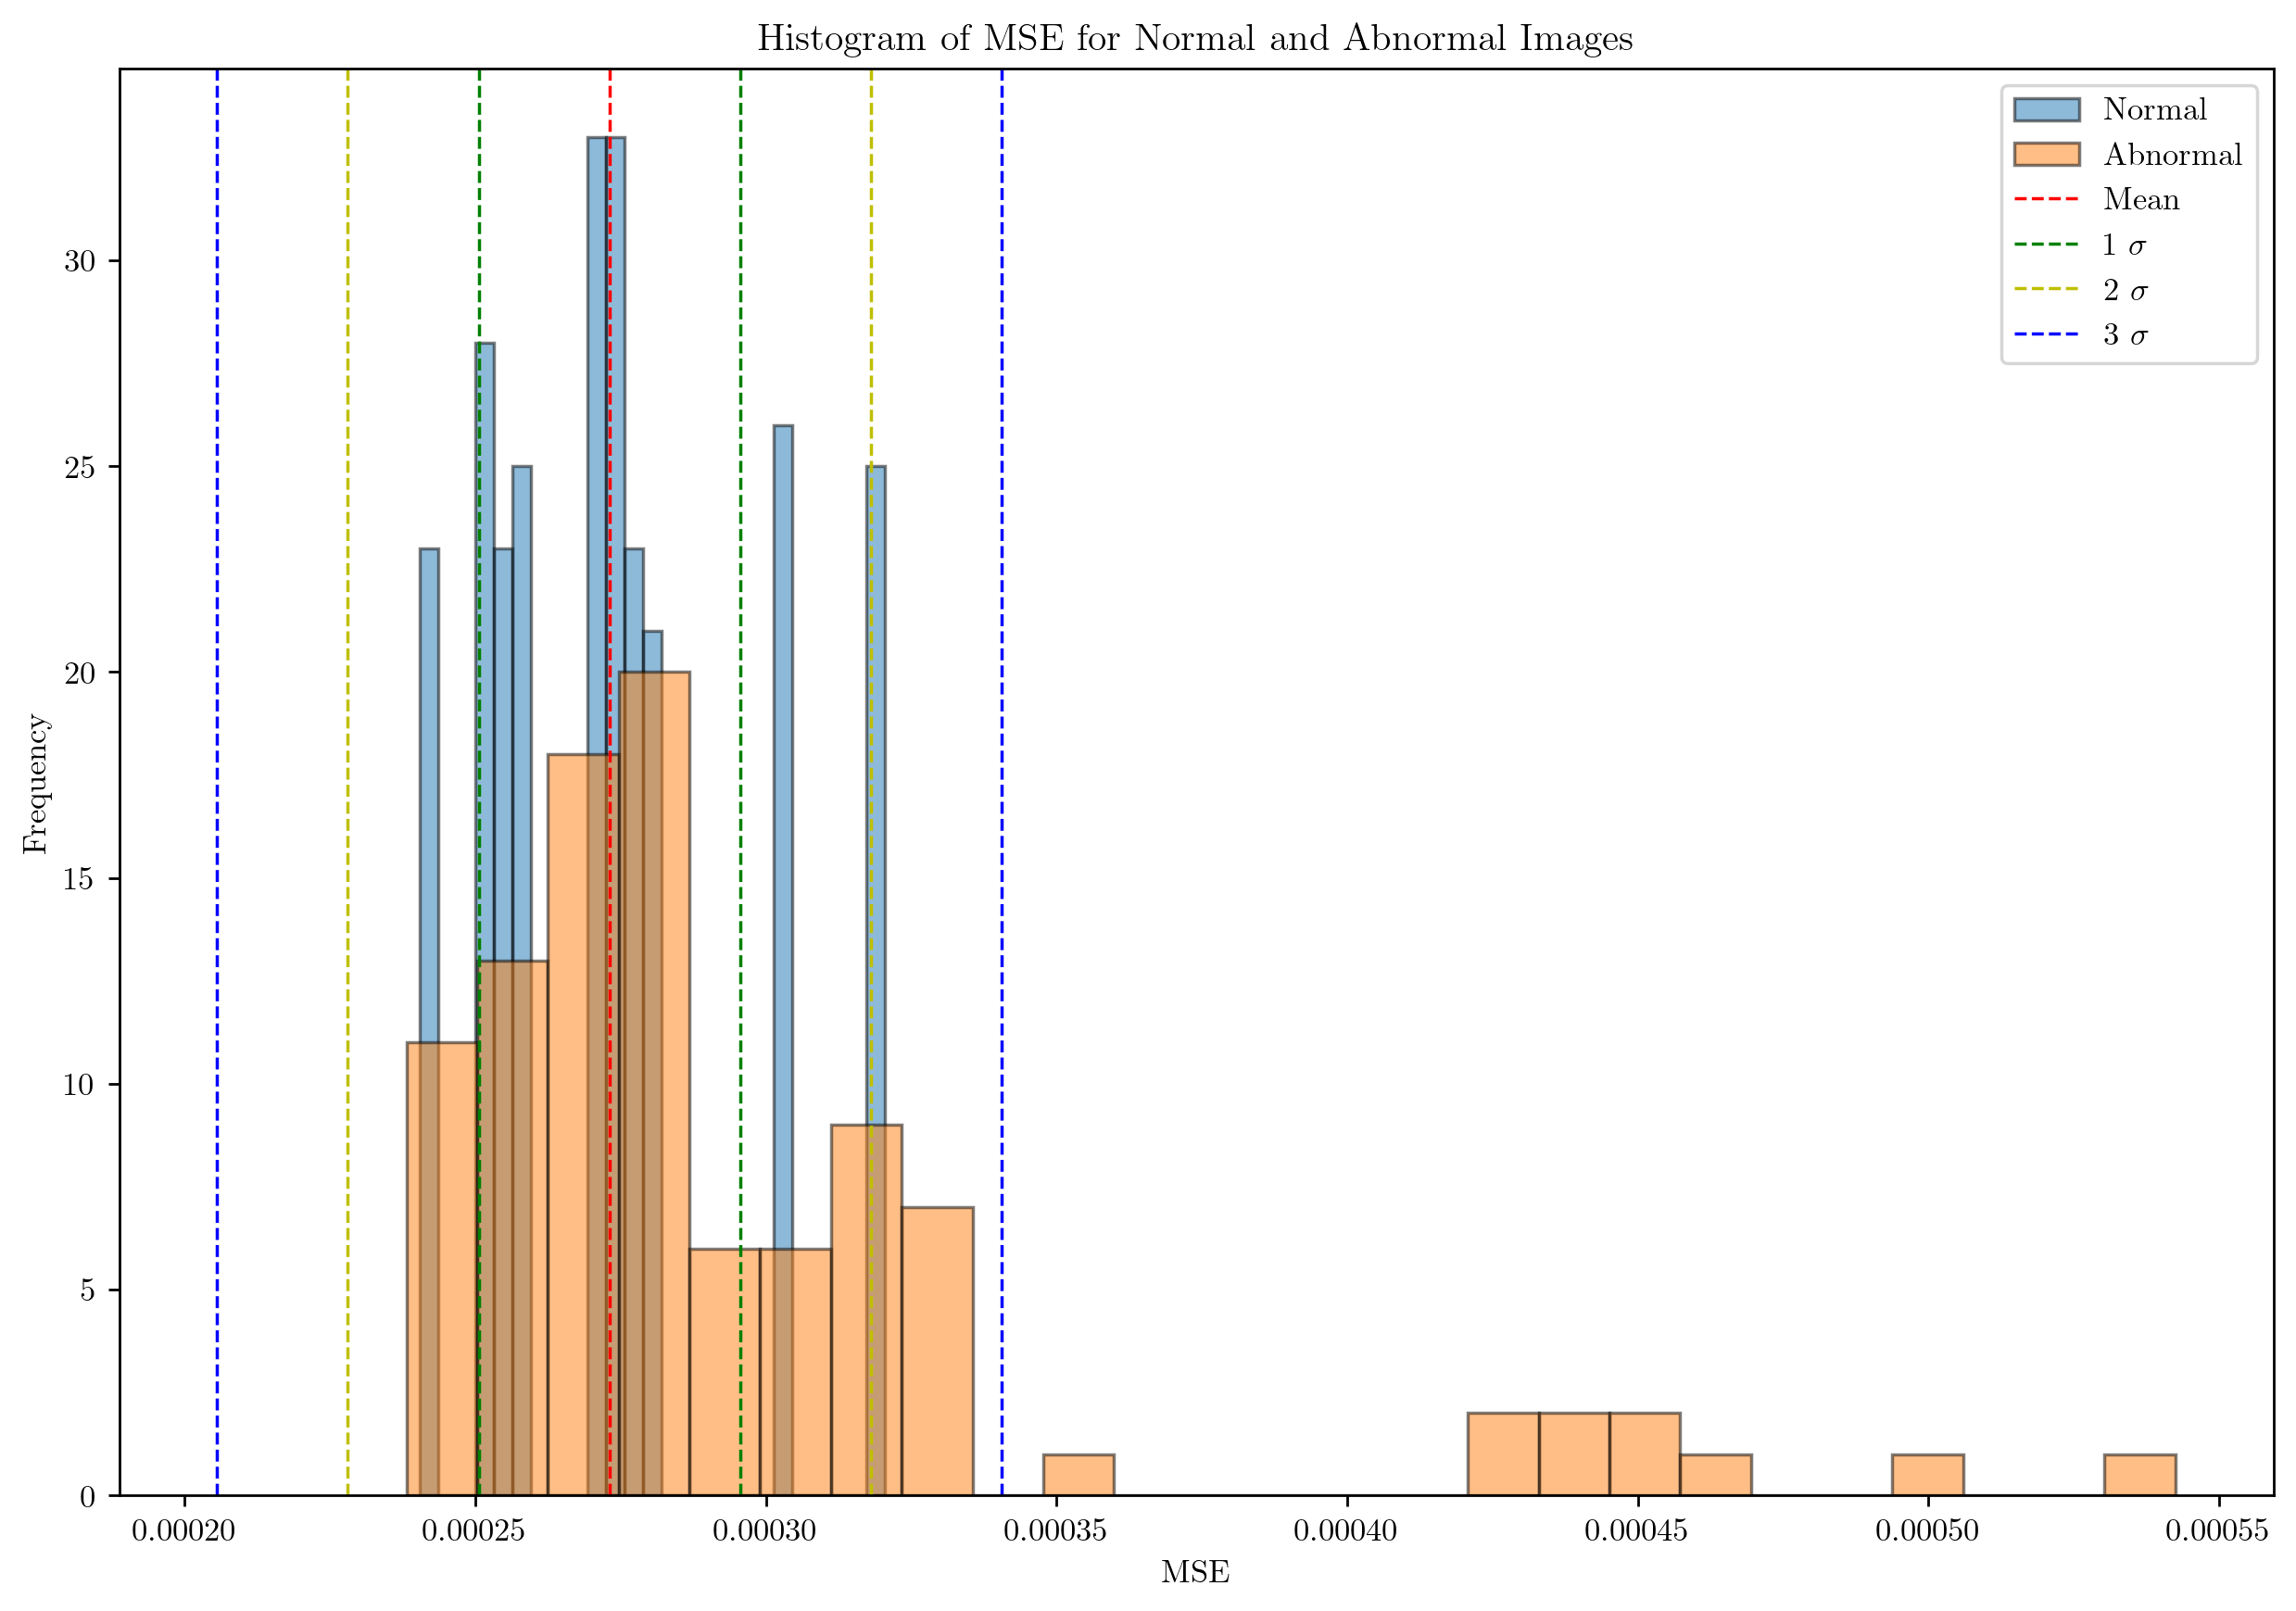

<Figure size 640x480 with 0 Axes>

In [7]:
from src.Dataloader import Dataloader
dataloader = Dataloader("Datasets/Dataset004")
train_loader, vali_loader, test_loader = dataloader.load_train_vali_test_dataloaders_with_n_images(n_images, BS=1)
test_loader = dataloader.load_test_dataloader(n_images, BS=1, path = "/Test_easy")
MSE_normal = []
MSE_abnormal = []
for inputs, labels in test_loader:
    inputs = inputs.cuda()
    feature = extractor(inputs) # Extract features using the feature extractor
    outputs = model(feature) # Pass the features through the autoencoder
    mse = criterion(outputs, feature).item()
    if labels == 0:
        MSE_normal.append(mse)
    else:
        MSE_abnormal.append(mse)

for inputs in train_loader:
    inputs = inputs.cuda()
    feature = extractor(inputs) # Extract features using the feature extractor
    outputs = model(feature) # Pass the features through the autoencoder
    mse = criterion(outputs, feature).item()
    MSE_normal.append(mse)

variancePlot = np.var(MSE_normal)


plt.figure(dpi=250, figsize=(12, 8))
plt.hist(MSE_normal, bins=25, alpha=0.5, label='Normal', edgecolor='black')
plt.hist(MSE_abnormal, bins=25, alpha=0.5, label='Abnormal', edgecolor='black')
plt.axvline(x=np.mean(MSE_normal), color='r', linestyle='dashed', linewidth=1, label='Mean')
plt.axvline(x=np.mean(MSE_normal) + np.sqrt(variancePlot), color='g', linestyle='dashed', linewidth=1, label='1 $\sigma$')
plt.axvline(x=np.mean(MSE_normal) - np.sqrt(variancePlot), color='g', linestyle='dashed', linewidth=1)
plt.axvline(x=np.mean(MSE_normal) + 2*np.sqrt(variancePlot), color='y', linestyle='dashed', linewidth=1, label='2 $\sigma$')
plt.axvline(x=np.mean(MSE_normal) - 2*np.sqrt(variancePlot), color='y', linestyle='dashed', linewidth=1)
plt.axvline(x=np.mean(MSE_normal) + 3*np.sqrt(variancePlot), color='b', linestyle='dashed', linewidth=1, label='3 $\sigma$')
plt.axvline(x=np.mean(MSE_normal) - 3*np.sqrt(variancePlot), color='b', linestyle='dashed', linewidth=1)




plt.title('Histogram of MSE for Normal and Abnormal Images')
plt.xlabel('MSE')
plt.ylabel('Frequency')
plt.legend()
plt.show()
plt.savefig("figures/MSE histogram for simple auto encoder.pdf", format="pdf", bbox_inches="tight")

Shape of the input image: torch.Size([1, 4, 224, 224])
Shape of the feature map: torch.Size([1, 384, 28, 28])
Shape of the reconstructed image: torch.Size([1, 384, 28, 28])
Shape of the reconstruction error: torch.Size([1, 1, 28, 28])
Shape of the segmentation map: torch.Size([1, 1, 224, 224])


<Figure size 640x480 with 0 Axes>

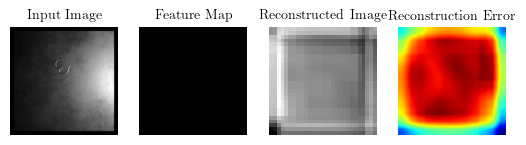

In [8]:
normal_image = images[0].unsqueeze(0)
normal_image = normal_image.cuda()
normal_feature = extractor(normal_image) # Extract features using the feature extractor

images = dataloader.get_images(dataloader.path + "\Test_easy", n_images=4)
images = torch.tensor(images, dtype=torch.float32)
image = images[0].unsqueeze(0)
image = image.cuda()


with torch.no_grad():
    features = extractor(image.cuda())
    recon = model(features)

recon_error =  ((features-recon)**2).mean(axis=(1)).unsqueeze(0)

segm_map = torch.nn.functional.interpolate(     # Upscale by bi-linaer interpolation to match the original input resolution
                recon_error,
                size=(224, 224),
                mode='bilinear'
            )

# -------------------------------- print info -------------------------------- #
print("Shape of the input image:", image.shape)
print("Shape of the feature map:", features.shape)
print("Shape of the reconstructed image:", recon.shape)
print("Shape of the reconstruction error:", recon_error.shape)
print("Shape of the segmentation map:", segm_map.shape)




# -------------------------------- plot defect ------------------------------- #
plt.figure()
fig, ax = plt.subplots(1,4)
ax[0].imshow(image[0].cpu()[0], cmap='gray')
ax[1].imshow(features[0].cpu()[0], cmap='gray')
ax[2].imshow(recon[0].cpu()[0], cmap='gray')
ax[3].imshow(segm_map.squeeze().cpu().numpy(), cmap='jet')
ax[0].axis('OFF')
ax[1].axis('OFF')
ax[2].axis('OFF')
ax[3].axis('OFF')
ax[0].set_title('Input Image', fontsize=10)
ax[1].set_title('Feature Map', fontsize=10)
ax[2].set_title('Reconstructed Image', fontsize=10)
ax[3].set_title('Reconstruction Error', fontsize=10)


plt.show()


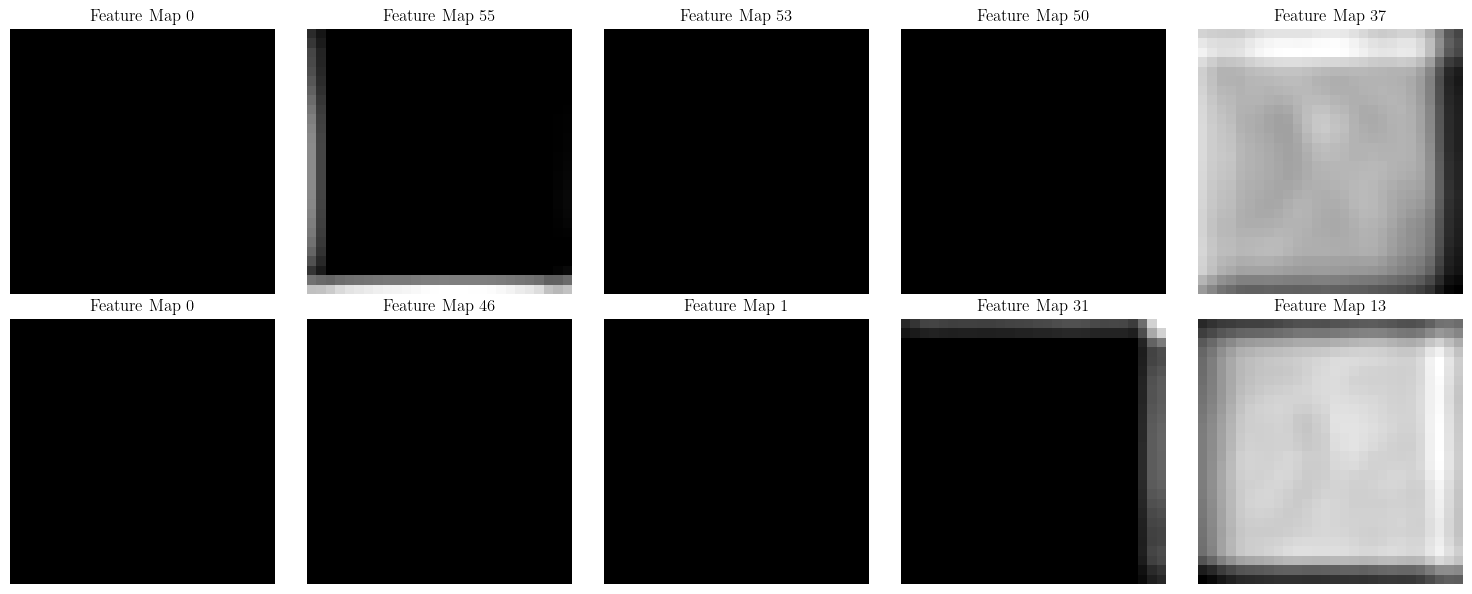

Output shape: torch.Size([1, 384, 28, 28])


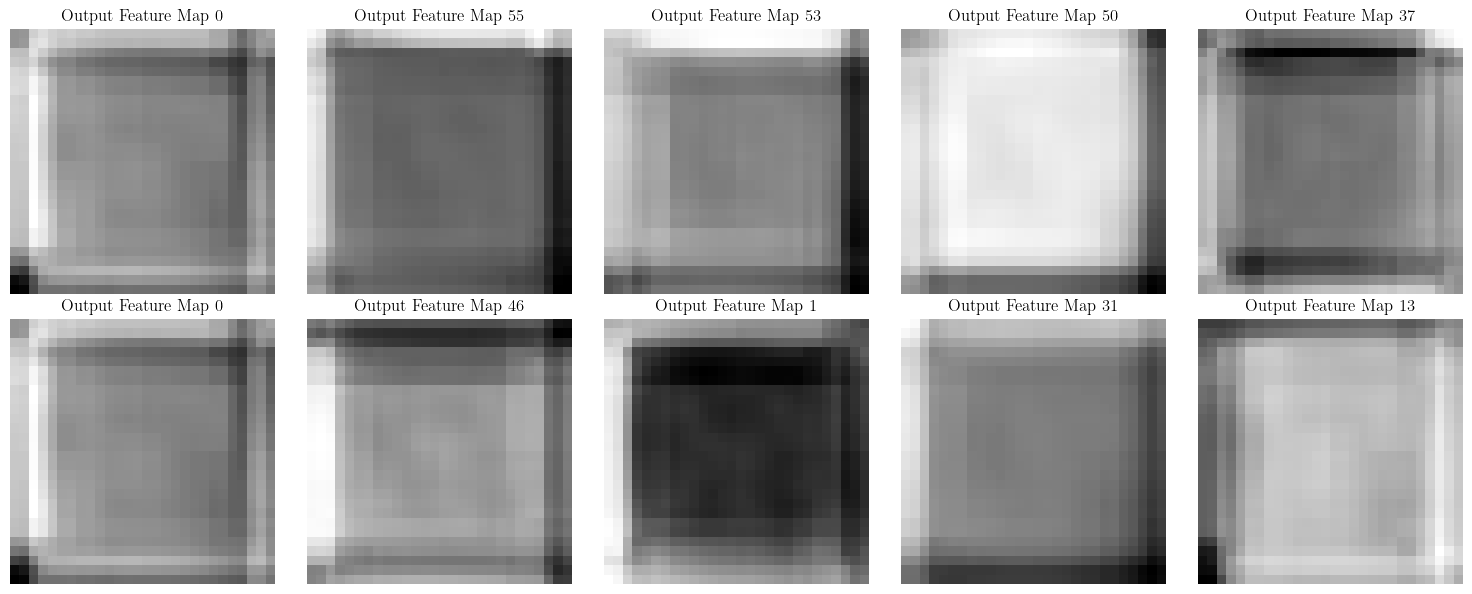

In [9]:
# Select 10 random indices for feature maps

# Plot the selected feature maps
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
for i, idx in enumerate(indices):
    row = i // 5
    col = i % 5
    axes[row, col].imshow(features[0,idx].detach().cpu(), cmap='gray')
    axes[row, col].set_title(f'Feature Map {idx}')
    axes[row, col].axis('off')
plt.tight_layout()
plt.show()

output = model(features)
print("Output shape:", output.shape)
# Plot the output feature maps
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
for i, idx in enumerate(indices):
    row = i // 5
    col = i % 5
    axes[row, col].imshow(output[0,idx].detach().cpu(), cmap='gray')
    axes[row, col].set_title(f'Output Feature Map {idx}')
    axes[row, col].axis('off')
plt.tight_layout()